### Arbitrary Value Imputation

it consists of replacing NAN by an arbitrary value

In [1]:
import pandas as pd 

In [3]:
df = pd.read_csv(r'titanic_train.csv', usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [5]:
def impute_nan(df,variable):
    df[vairable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

<AxesSubplot:>

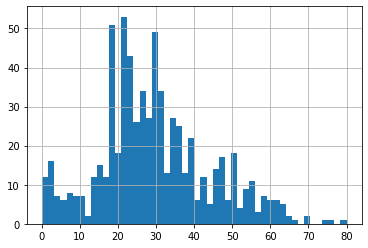

In [6]:
df['age'].hist(bins=50)

### Advantages
  easy to implement
  
  capture the importance of missingnessif there is any
    
### Disadvantages
  distorts the original distribution of variable
  
  if missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
  
  hard to decide which value to use

# How to Handle Ctegorical Missing Values

### Frequent Category Imputaion

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'housing_price_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [3]:
df.isnull().sum().sort_values(ascending=True)  #asc w.r.t. values

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

In [4]:
df.shape #as rows=1460 & BsmtQual=37, garagetype=81 very less in no.replace with 
         #most freq values it will not distort the relation

(1460, 4)

### Compute the frequency with every feature

In [5]:
df.groupby(['BsmtQual'])  #we get the DataFrame groupby

In [6]:
df.groupby(['BsmtQual'])['BsmtQual'].count()  

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

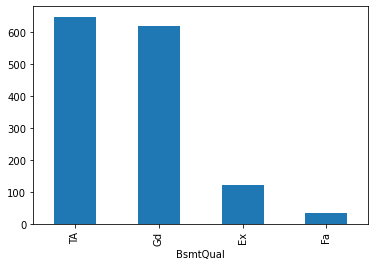

In [22]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

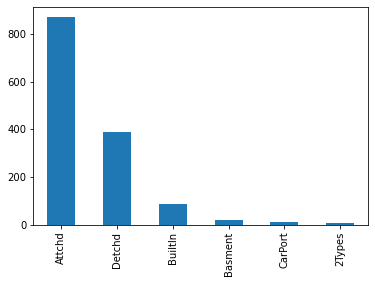

In [23]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

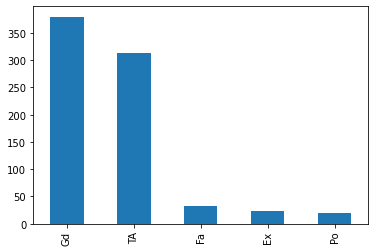

In [25]:
df['FireplaceQu'].value_counts().plot.bar()

In [32]:
df['GarageType'].value_counts().index[0]  #more freq

'Attchd'

In [12]:
#### replacing function 
def impute_nan(df,variable):
    most_freq_category = df[variable].value_counts().index[0]  
    df[variable].fillna(most_freq_category, inplace=True)

In [13]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [15]:
df.isnull().mean()  # no null values now

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### OR

df['GarageType'].mode()[0]

def impute_nan(df,variable):
    most_freq = df[variable].mode()[0]
    df[variable].fillna(most_freq, inplace=True)
    
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

#### Advantages:
   1.easy to implement
   2.faster way to implement
####  Disadvantages:
    1.since we are using the more frequent labels, it may use them in an over representes way, if there are many nans
    2.it distorts the relation of the most frequent labels
    

### Adding a variable to capture NAN

In [3]:
df = pd.read_csv(r'housing_price_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
import numpy as np
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)   # this is called captueing the importance of missing values

In [5]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [13]:
frequent = df['BsmtQual'].mode()[0]
frequent

'TA'

In [15]:
df['BsmtQual'].fillna(frequent, inplace=True)

In [16]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [17]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
freq = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(freq,inplace=True)   

In [18]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### suppose if we have more frequent categories we just replace NAN with the new category (most used technique with lots of advantages)

In [19]:
df = pd.read_csv(r'housing_price_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [21]:
def impute_nan(df,variable):
    df[variable+'newvar'] = np.where(df[variable].isnull(), 'Missing', df[variable])

In [22]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [23]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [24]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)  #so missing is a new category here

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd
